In [610]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import datetime, date

In [611]:
df = pd.read_csv("HRDataSet.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [612]:
df.DOB.head()

0    7/10/1983
1     5/5/1975
2    9/19/1988
3    9/27/1988
4     9/8/1989
Name: DOB, dtype: object

In [613]:
df.DOB[0]
type(df.DOB[0])

str

In [614]:
df.DOB=pd.to_datetime(df.DOB).dt.date
df.DOB.head()

0    1983-07-10
1    1975-05-05
2    1988-09-19
3    1988-09-27
4    1989-09-08
Name: DOB, dtype: object

In [615]:
type(df.DOB[0])

datetime.date

In [616]:
df.DateofHire=pd.to_datetime(df.DateofHire).dt.date
df.DateofHire.head()

0    2011-07-05
1    2015-03-30
2    2011-07-05
3    2008-01-07
4    2011-07-11
Name: DateofHire, dtype: object

In [617]:
type(df.DateofHire[0])

datetime.date

In [618]:
# extracting the year from the Date of Hire
df['year'] = pd.DatetimeIndex(df['DateofHire']).year
display(df.year)

0      2011
1      2015
2      2011
3      2008
4      2011
       ... 
306    2014
307    2008
308    2010
309    2015
310    2014
Name: year, Length: 311, dtype: int64

In [619]:
# This function converts given date to age
def calculate_tenure(hire_date):
    today = date.today()
    return today.year - hire_date.year - ((today.month, 
                                      today.day) < (hire_date.month, 
                                                    hire_date.day))
  
df['Tenure'] = df['DateofHire'].apply(calculate_tenure)
  
display(df.Tenure)

0      11
1       7
2      11
3      14
4      11
       ..
306     8
307    13
308    12
309     7
310     7
Name: Tenure, Length: 311, dtype: int64

In [620]:
  
# This function converts given date to age
def calculate_age(born_date):
    today = date.today()
    return today.year - born_date.year - ((today.month, 
                                      today.day) < (born_date.month, 
                                                    born_date.day))
  
df['Age'] = df['DOB'].apply(calculate_age)
  
display(df.Age)

0      39
1      47
2      33
3      33
4      32
       ..
306    37
307    40
308    42
309    43
310    43
Name: Age, Length: 311, dtype: int64

In [621]:
df[['Age','Salary','Absences']].mean()

Age            42.938907
Salary      69020.684887
Absences       10.237942
dtype: float64

In [622]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'Tenure', 'Age'],
      dtype='object')

In [623]:
df.Age.groupby(df.Sex).agg(['mean','count'])

,mean,count
Sex,,
F,43.051136,176
M,42.792593,135


In [624]:
df.groupby(df.Sex).agg(mean_age=('Age','mean'),mean_salary=("Salary","mean"),mean_tenure=('Tenure','mean'),count_gender=('Sex','count'))

,mean_age,mean_salary,mean_tenure,count_gender
Sex,,,,
F,43.051136,67786.727273,9.102273,176
M,42.792593,70629.400000,8.866667,135


In [625]:
df.groupby(['Sex', 'EmploymentStatus']).Sex.agg(['count'])


count
Sex EmploymentStatus             
F   Active                    116
    Terminated for Cause        9
    Voluntarily Terminated     51
M   Active                     91
    Terminated for Cause        7
    Voluntarily Terminated     37

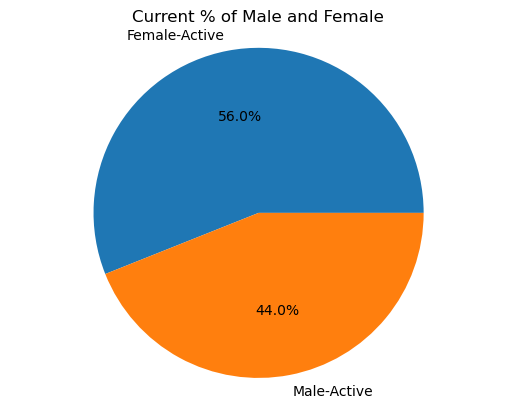

In [626]:
Tasks = [116,91]

my_labels = 'Female-Active','Male-Active'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Current % of Male and Female')
plt.axis('equal')
plt.show()

Analysis: Company currently have more females than males active. 

In [627]:
df.groupby(['Sex','EmploymentStatus']).agg(mean_age=('Age','mean'), mean_tenure=('Tenure','mean'),mean_salary=('Salary','mean'))



mean_age  mean_tenure   mean_salary
Sex EmploymentStatus                                            
F   Active                  42.336207     8.525862  70215.568966
    Terminated for Cause    39.444444     8.666667  72929.222222
    Voluntarily Terminated  45.313725    10.490196  61354.803922
M   Active                  42.285714     8.340659  71303.945055
    Terminated for Cause    44.142857     9.285714  78267.857143
    Voluntarily Terminated  43.783784    10.081081  67525.270270

Analysis: Active female and male age average is 42 years old. The tenure of females is slightly higher, female is 8.52 years, while male is 8.3 years. However, males have higher average salary than females. 
**pergunta: calculate date range per generation. 

In [628]:
df.groupby(['Sex','year']).Sex.agg(['count'])

count
Sex year       
F   2008      3
    2009      5
    2010      5
    2011     52
    2012     23
    2013     27
    2014     31
    2015     21
    2016      8
    2017      1
M   2006      1
    2007      2
    2009      2
    2010      4
    2011     31
    2012     22
    2013     17
    2014     29
    2015     15
    2016      6
    2017      5
    2018      1

<AxesSubplot:xlabel='Sex,year'>

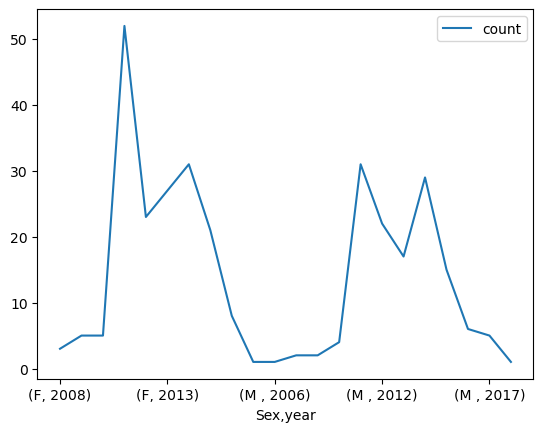

In [630]:
df.groupby(['Sex','year']).Sex.agg(['count']).plot(legend=True)

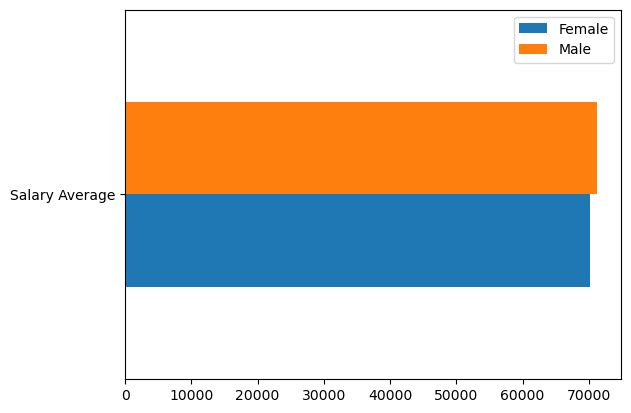

In [631]:
# Define Data

data = {'Female': [70215.5],
        'Male': [71303.9] }
df = pd.DataFrame(data,columns=['Female','Male'], index = ['Salary Average',])

# Multiple horizontal bar chart

df.plot.barh()

# Display

plt.show()

Analysis: Males have higher average salary than females. 
##pergunta: como eu adiciono label no grafico?